In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Statistical analyses based on dataset "cell_attributes"

In [58]:
# Connect to database
con = psycopg2.connect("dbname='SNZLab' user='postgres' host='localhost' password='PlantDevSchnLab112022'")

# Open a cursor to perform database operations
cur = con.cursor()

In [59]:
# Execute a command
# Load data from table cell_attributes
cur.execute("SELECT * FROM cell_attributes")

# Obtain data as python object

# Obtain first row of data table
# first_col = cur.fetchone()

# Obtain all rows of data table
cell_attributes = cur.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cur.description]

In [60]:
# Create pandas DataFrame from list of tuples
df = pd.DataFrame(cell_attributes)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,cell_id,parent_label,genotype,sample_id,stage,cell_length_x,cell_length_y,cell_length_z,cell_wall_area,number_of_neighbors,outside_wall_area,outside_wall_area_ratio,volume
0,1835,7,ChiOX,1793,3-IV,6.00088,5.29523,6.09765,148.201,3,108.799,0.734131,142.288
1,1838,7,ChiOX,1793,3-IV,5.57317,4.97323,8.43972,147.736,7,105.308,0.712816,131.511
2,1842,7,ChiOX,1793,3-IV,7.01422,5.10685,9.65658,205.962,9,101.471,0.492667,228.485
3,1846,7,ChiOX,1793,3-IV,6.57697,4.84003,10.2757,221.655,13,114.535,0.516727,245.79
4,1847,7,ChiOX,1793,3-IV,5.87977,5.71539,6.19016,135.858,7,69.4824,0.511433,132.188


In [61]:
# Add parent and tissue label according to variable "parent_id"
df['parent_name']=df['parent_label'].apply(lambda x: 'oi2' if x==1 else ('oi1' if x==2 else ('ii2' if x==3 else ('ii1' if x==4 else ('nu' if x==5 else ('PCh' if x==6 else ('fu' if x==7 else ('es' if x==8 else ('pl' if x==9 else 'ACh')))))))))
df['tissue_label'] = df['parent_label'].apply(lambda x: 'oi' if x==1 or x==2 else ('ii' if x==3 or x==4 else ('ch' if x==6 or x==10 else ('nu' if x==5 else ('fu' if x==7 else ('es' if x==8 else 'pl'))))))
df.head()

,cell_id,parent_label,genotype,sample_id,stage,cell_length_x,cell_length_y,cell_length_z,cell_wall_area,number_of_neighbors,outside_wall_area,outside_wall_area_ratio,volume,parent_name,tissue_label
0,1835,7,ChiOX,1793,3-IV,6.00088,5.29523,6.09765,148.201,3,108.799,0.734131,142.288,fu,fu
1,1838,7,ChiOX,1793,3-IV,5.57317,4.97323,8.43972,147.736,7,105.308,0.712816,131.511,fu,fu
2,1842,7,ChiOX,1793,3-IV,7.01422,5.10685,9.65658,205.962,9,101.471,0.492667,228.485,fu,fu
3,1846,7,ChiOX,1793,3-IV,6.57697,4.84003,10.2757,221.655,13,114.535,0.516727,245.79,fu,fu
4,1847,7,ChiOX,1793,3-IV,5.87977,5.71539,6.19016,135.858,7,69.4824,0.511433,132.188,fu,fu


In [63]:
# Count unique values in variable "sample_id"
count_sample = df[['sample_id']].value_counts().reset_index(name='n')
print(count_sample)

   sample_id     n
0       1793  1803


In [64]:
# Group by variables "sample_id", "stage" and sum up the volume
volume_sample = df.groupby(['sample_id', 'stage'])['volume'].sum().reset_index()
print(volume_sample)

   sample_id stage          volume
0       1793  3-IV  549413.2776469


In [65]:
# Group by variables "sample_id", "stage" and sum up the volume
tissue_volume_sample = df.groupby(['stage', 'sample_id', 'tissue_label'])['volume'].sum().reset_index()
print(tissue_volume_sample)

  stage  sample_id tissue_label         volume
0  3-IV       1793           ch   89611.349193
1  3-IV       1793           es         5820.9
2  3-IV       1793           fu   84846.750602
3  3-IV       1793           ii     82750.5200
4  3-IV       1793           nu    13064.33455
5  3-IV       1793           oi  265555.296438
6  3-IV       1793           pl   7764.1268639


In [66]:
# Group by variables "sample_id", "stage" and count unique values in variable "parent"
count_parent_by_sample = df.groupby(['sample_id', 'stage'])['parent_label'].value_counts().sort_index(ascending=True).reset_index(name='n')
print(count_parent_by_sample)

    sample_id stage  parent_label    n
0        1793  3-IV             0   29
1        1793  3-IV             1  238
2        1793  3-IV             2  188
3        1793  3-IV             3  140
4        1793  3-IV             4  126
5        1793  3-IV             5   92
6        1793  3-IV             6  261
7        1793  3-IV             7  528
8        1793  3-IV             8    1
9        1793  3-IV            10  171
10       1793  3-IV            14   29


In [67]:
# Group by variables "stage" and count unique values in variable "sample_id"
count_sample_by_stage = df.groupby(['stage'])['sample_id'].value_counts().reset_index(name='n')
print(count_sample_by_stage)

  stage  sample_id     n
0  3-IV       1793  1803


Statistical analyses based on dataset "V12_Platinum_158_dataset_All_stages"

In [14]:
# Load data from table V12_Platinum_158_dataset_All_stages
cur.execute("SELECT * FROM v12_platinum_158_dataset")

# Obtain first row of data table
# first_col = cur.fetchone()

# Obtain all rows of data table
v12_plat_158 = cur.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cur.description]

In [15]:
# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle,pd_pol_integ,dv_pol_ovule,distance_coordinate,max_pds_length,min_pds_length,ovule_metadata,cell_metadata,manual_proofread,unnamed_16
0,Col-0,1-II,290_7x,290_D,4163.0,L2,309.7,I,None,None,23.557,None,None,X290_D_dist,32.0,None,None
1,Col-0,1-II,290_7x,290_D,2154.0,L2,281.825,I,None,None,20.8733,None,None,X290_D_dist,32.0,None,None
2,Col-0,1-II,290_7x,290_D,63.0,L2,237.621,I,None,None,23.3274,None,None,X290_D_dist,32.0,None,None
3,Col-0,1-II,290_7x,290_D,3838.0,L2,232.475,I,None,None,26.291,None,None,X290_D_dist,32.0,None,None
4,Col-0,1-II,290_7x,290_D,1192.0,L1,212.399,I,None,None,22.6154,None,None,X290_D_dist,31.0,None,None


In [16]:
# Count number of cells per ovule per stage
# Group by variables "stage_id" and count unique values in "ovule_id"
count_cells_by_stage = df.groupby(['stage'])['ovule_id'].value_counts().reset_index(name='n')
print(count_cells_by_stage)

    stage ovule_id     n
0     1-I    786_B    48
1     1-I    783_A    46
2     1-I    784_B    45
3     1-I    786_D    45
4     1-I    785_C    41
..    ...      ...   ...
153  3-VI      752  1812
154  3-VI      756  1765
155  3-VI      754  1729
156  3-VI      755  1708
157  3-VI      559  1698

[158 rows x 3 columns]


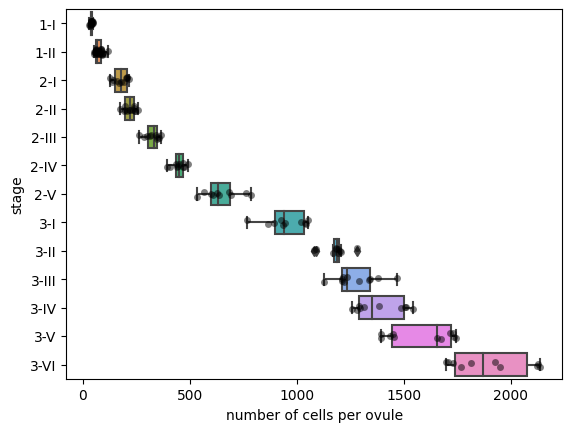

In [17]:
# Box plot of number of cells per ovule over stage

# Box plots
sns.boxplot(data=count_cells_by_stage, x='n', y='stage')

# Scatter plots
sns.stripplot(data=count_cells_by_stage, x='n', y='stage', color='black', alpha=0.5)

# Change label of x-axis
plt.xlabel('number of cells per ovule')

# Show plot
plt.show()

In [18]:
# Compute total volume of ovule per stage
# Group by variables "stage", "ovule_id" and sum up the volume
ovule_volume_by_stage = df.groupby(['stage', 'ovule_id'])['cell_vol'].sum().reset_index()
print(ovule_volume_by_stage)

    stage ovule_id    cell_vol
0     1-I    783_A   5273.1159
1     1-I    784_A   5118.4659
2     1-I    784_B   5755.6761
3     1-I    784_D   5650.7137
4     1-I    785_A   5501.2369
..    ...      ...         ...
153  3-VI      752  456429.046
154  3-VI      753  493163.326
155  3-VI      754  457321.295
156  3-VI      755  388492.214
157  3-VI      756  406446.508

[158 rows x 3 columns]


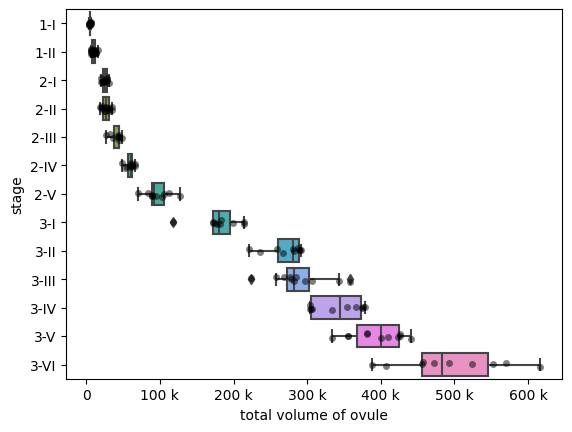

In [19]:
# Box plot of total volume of ovule over stage

# Convert variable "cell_vol" from type decimal to type float
ovule_volume_by_stage['cell_vol'] = ovule_volume_by_stage['cell_vol'].astype('float')

# Init plot
fig, ax = plt.subplots()

# Box plots
sns.boxplot(data=ovule_volume_by_stage, x='cell_vol', y='stage')

# Scatter plots
sns.stripplot(data=ovule_volume_by_stage, x='cell_vol', y='stage', color='black', alpha=0.5)

# Change format of tick labels for readability
ax.xaxis.set_major_formatter(ticker.EngFormatter())

# Change label of x-axis
plt.xlabel('total volume of ovule')

# Show plot
plt.show()

In [20]:
# Compute overall number of cells and number of mitotic cells per ovule per stage
# Group by variables "stage" and count unique values in variable "ovule_id"
count_mcells_by_stage = df[df['cell_cycle'] == 'M']
count_mcells_by_stage = count_mcells_by_stage.groupby(['stage'])['ovule_id'].value_counts().reset_index(name='n_mitotic')
print(count_mcells_by_stage)

    stage ovule_id  n_mitotic
0     1-I    784_B          1
1     1-I    784_D          1
2     1-I    786_B          1
3     1-I    787_B          1
4    1-II    601_B          2
..    ...      ...        ...
124  3-VI      756         12
125  3-VI      559         11
126  3-VI      751         10
127  3-VI      557          7
128  3-VI      752          6

[129 rows x 3 columns]


In [21]:
# Merge tables to display number of total cells and number of mitotic cells per ovule per stage

# Define variables by which to group
gr = ['ovule_id', 'stage']

# Merge DataFrames with a database-style join
count_by_stage = pd.merge(count_cells_by_stage, count_mcells_by_stage, left_on=gr, right_on=gr, how='outer')

# Replace NaN values in variable "n_mitotic" by zero values and convert back to type "integer"
count_by_stage['n_mitotic'] = count_by_stage['n_mitotic'].fillna(0).astype('int64')

# Calculate ratio between overall number of cells and number of mitotic cells
count_by_stage['ratio'] = count_by_stage['n_mitotic'] / count_by_stage['n']

# Print data
print(count_by_stage)

    stage ovule_id     n  n_mitotic     ratio
0     1-I    786_B    48          1  0.020833
1     1-I    783_A    46          0  0.000000
2     1-I    784_B    45          1  0.022222
3     1-I    786_D    45          0  0.000000
4     1-I    785_C    41          0  0.000000
..    ...      ...   ...        ...       ...
153  3-VI      752  1812          6  0.003311
154  3-VI      756  1765         12  0.006799
155  3-VI      754  1729         14  0.008097
156  3-VI      755  1708         12  0.007026
157  3-VI      559  1698         11  0.006478

[158 rows x 5 columns]


In [71]:
# Load data from table V12_Platinum_158_dataset_All_stages
# Filter by early stages (1-I until 2-IV)

cur.execute("SELECT * FROM v12_platinum_158_dataset WHERE stage IN ('1-I','1-II','2-I','2-II','2-III','2-IV');")

# Obtain first row of data table
# first_col = cur.fetchone()

# Obtain all rows of data table
v12_plat_158_early = cur.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cur.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158_early)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle,pd_pol_integ,dv_pol_ovule,distance_coordinate,max_pds_length,min_pds_length,ovule_metadata,cell_metadata,manual_proofread,unnamed_16
0,Col-0,1-II,290_7x,290_D,4163.0,L2,309.7,I,None,None,23.557,None,None,X290_D_dist,32.0,None,None
1,Col-0,1-II,290_7x,290_D,2154.0,L2,281.825,I,None,None,20.8733,None,None,X290_D_dist,32.0,None,None
2,Col-0,1-II,290_7x,290_D,63.0,L2,237.621,I,None,None,23.3274,None,None,X290_D_dist,32.0,None,None
3,Col-0,1-II,290_7x,290_D,3838.0,L2,232.475,I,None,None,26.291,None,None,X290_D_dist,32.0,None,None
4,Col-0,1-II,290_7x,290_D,1192.0,L1,212.399,I,None,None,22.6154,None,None,X290_D_dist,31.0,None,None


In [72]:
# Count unique values in variable "stage"
by_stage = df[['stage']].value_counts().sort_index(ascending=True).reset_index(name='n')
print(by_stage)

   stage     n
0    1-I   554
1   1-II  2071
2    2-I  1946
3   2-II  2868
4  2-III  3241
5   2-IV  4471


In [73]:
# Load data from table V12_Platinum_158_dataset_All_stages
# Filter by later stages (2-II until 3-VI)

cur.execute("SELECT * FROM v12_platinum_158_dataset WHERE stage IN ('2-II','2-III','2-IV','2-V','3-I','3-II','3-III','3-IV','3-V','3-VI');")

# Obtain first row of data table
# first_col = cur.fetchone()

# Obtain all rows of data table
v12_plat_158_late = cur.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cur.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158_late)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle,pd_pol_integ,dv_pol_ovule,distance_coordinate,max_pds_length,min_pds_length,ovule_metadata,cell_metadata,manual_proofread,unnamed_16
0,Col-0,2-II,769,769,383.0,L2,836.147,I,None,None,None,None,None,None,None,None,None
1,Col-0,2-II,769,769,775.0,L3,407.212,I,None,None,None,None,None,None,None,None,None
2,Col-0,2-II,769,769,787.0,L3,319.006,I,None,None,None,None,None,None,None,None,None
3,Col-0,2-II,769,769,255.0,L3,310.791,I,None,None,None,None,None,None,None,None,None
4,Col-0,2-II,769,769,261.0,L2,279.569,M,None,None,None,None,None,None,None,None,None


In [74]:
# Count unique values in variable "stage"
by_stage = df[['stage']].value_counts().sort_index(ascending=True).reset_index(name='n')
print(by_stage)

   stage      n
0   2-II   2868
1  2-III   3241
2   2-IV   4471
3    2-V   6487
4    3-I   9481
5   3-II  11775
6  3-III  14033
7   3-IV  13866
8    3-V  17375
9   3-VI  18968


In [76]:
# Load data from table V12_Platinum_158_dataset_All_stages
# Filter by specific stage and cell type/layer
# Adapt naming to chosen stage and cell type/layer

cur.execute("SELECT * FROM v12_platinum_158_dataset WHERE stage='1-I' AND cell_type='L1'")

# Obtain first row of data table
# first_col = cur.fetchone()

# Obtain all rows of data table
v12_plat_158_1I_L1 = cur.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cur.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158_1I_L1)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle,pd_pol_integ,dv_pol_ovule,distance_coordinate,max_pds_length,min_pds_length,ovule_metadata,cell_metadata,manual_proofread,unnamed_16
0,Col-0,1-I,783_5x,783_A,2180.0,L1,205.062,I,None,None,16.0724,None,None,X783_A_41_dist,41.0,None,None
1,Col-0,1-I,783_5x,783_A,1260.0,L1,186.779,I,None,None,17.1828,None,None,X783_A_41_dist,41.0,None,None
2,Col-0,1-I,783_5x,783_A,1841.0,L1,179.353,I,None,None,8.51093,None,None,X783_A_41_dist,41.0,None,None
3,Col-0,1-I,783_5x,783_A,102.0,L1,158.205,I,None,None,14.7705,None,None,X783_A_41_dist,41.0,None,None
4,Col-0,1-I,783_5x,783_A,1181.0,L1,156.158,I,None,None,20.4346,None,None,X783_A_41_dist,41.0,None,None


In [86]:
# Count number of cells per ovule filtered by a specific stage and cell type/layer
count_per_ovule = df[['stage','ovule_id','cell_type']].value_counts().reset_index(name='n')
print(count_per_ovule)

   stage ovule_id cell_type   n
0    1-I    786_B        L1  32
1    1-I    783_A        L1  30
2    1-I    786_D        L1  30
3    1-I    784_B        L1  29
4    1-I    786_A        L1  28
5    1-I    785_C        L1  25
6    1-I    787_A        L1  25
7    1-I    787_B        L1  25
8    1-I    785_B        L1  24
9    1-I    784_A        L1  23
10   1-I    784_D        L1  23
11   1-I    785_A        L1  23
12   1-I    786_C        L1  21
13   1-I    786_E        L1  20
